<a href="https://colab.research.google.com/github/sharmila2704/ML/blob/main/Vaccination_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Vaccination Data Analysis and Visualization**


# **Project Type    - EDA & Data Science**


# **Project Summary -**
This project focuses on analyzing global vaccination and disease incidence datasets to uncover meaningful health insights. The workflow involves data cleaning, preprocessing, and integration of multiple sources (coverage, incidence rates, reported cases, vaccine introduction, and schedules). Cleaned datasets are stored in a SQLite database for structured access. Exploratory Data Analysis (EDA) and visualizations are performed using Python (Pandas, Matplotlib, Seaborn) to identify vaccination trends, disease incidence patterns, age-wise vaccine administration, and top-reported diseases. The project delivers actionable insights for public health analysis and decision-making.

# **Problem Statement -**
Analyze global vaccination data to understand trends in vaccination coverage, disease incidence, and effectiveness. Data will be cleaned, and stored in a SQL database. Power BI will be used to connect to the SQL database and create interactive dashboards that provide insights on vaccination strategies and their impact on disease control

In [5]:
from google.colab import files
uploaded = files.upload()


Saving vaccine-schedule-data.xlsx to vaccine-schedule-data (1).xlsx


In [7]:
from google.colab import files
uploaded = files.upload()


Saving vaccine-introduction-data.xlsx to vaccine-introduction-data (1).xlsx


In [8]:
from google.colab import files
uploaded = files.upload()


Saving reported-cases-data.xlsx to reported-cases-data (1).xlsx


In [9]:
from google.colab import files
uploaded = files.upload()


Saving incidence-rate-data.xlsx to incidence-rate-data (1).xlsx


In [19]:
from google.colab import files
uploaded = files.upload()


Saving coverage-data.xlsx to coverage-data.xlsx


In [21]:
import pandas as pd
# Load all Excel files
coverage_data = pd.read_excel("coverage-data.xlsx")
vaccine_schedule_data = pd.read_excel("vaccine-schedule-data.xlsx")
incidence_data = pd.read_excel("incidence-rate-data.xlsx")
vaccine_intro_data = pd.read_excel("vaccine-introduction-data.xlsx")
reported_cases_data = pd.read_excel("reported-cases-data.xlsx")


In [15]:
#  Define a generic data cleaning function
def clean_dataset(df):
    df = df.copy()
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

    # Clean column names
    df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

    # Drop columns that have all missing values
    df.dropna(axis=1, how='all', inplace=True)

    # Convert 'YEAR' column to integer if it exists
    if 'YEAR' in df.columns:
        df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').astype('Int64')

    return df

In [22]:
#Clean all datasets
cleaned_coverage = clean_dataset(coverage_data)
cleaned_incidence = clean_dataset(incidence_data)
cleaned_reported_cases = clean_dataset(reported_cases_data)
cleaned_vaccine_intro = clean_dataset(vaccine_intro_data)
cleaned_vaccine_schedule = clean_dataset(vaccine_schedule_data)

In [23]:
#Preview first few rows of each cleaned dataset
print("Cleaned Coverage Data:\n", cleaned_coverage.head())
print("Cleaned Incidence Rate Data:\n", cleaned_incidence.head())
print("Cleaned Reported Cases Data:\n", cleaned_reported_cases.head())
print("Cleaned Vaccine Introduction Data:\n", cleaned_vaccine_intro.head())
print("Cleaned Vaccine Schedule Data:\n", cleaned_vaccine_schedule.head())

Cleaned Coverage Data:
        GROUP CODE   NAME  YEAR  ANTIGEN  \
0  COUNTRIES  ABW  Aruba  2023      BCG   
1  COUNTRIES  ABW  Aruba  2023      BCG   
2  COUNTRIES  ABW  Aruba  2023  DIPHCV4   
3  COUNTRIES  ABW  Aruba  2023  DIPHCV4   
4  COUNTRIES  ABW  Aruba  2023  DIPHCV5   

                                 ANTIGEN_DESCRIPTION COVERAGE_CATEGORY  \
0                                                BCG             ADMIN   
1                                                BCG          OFFICIAL   
2  Diphtheria-containing vaccine, 4th dose (1st b...             ADMIN   
3  Diphtheria-containing vaccine, 4th dose (1st b...          OFFICIAL   
4  Diphtheria-containing vaccine, 5th dose (2nd b...             ADMIN   

  COVERAGE_CATEGORY_DESCRIPTION  TARGET_NUMBER   DOSES  COVERAGE  
0       Administrative coverage            NaN     NaN       NaN  
1             Official coverage            NaN     NaN       NaN  
2       Administrative coverage         1044.0   945.0     90.52  
3   

In [24]:
cleaned_coverage.rename(columns={'GROUP': 'GROUP_NAME'}, inplace=True)
cleaned_incidence.rename(columns={'GROUP': 'GROUP_NAME'}, inplace=True)
cleaned_reported_cases.rename(columns={'GROUP': 'GROUP_NAME'}, inplace=True)

In [27]:
# Save cleaned datasets to the 'data/' folder as CSV files
cleaned_coverage.to_csv("cleaned_coverage_data.csv", index=False)
cleaned_incidence.to_csv("cleaned_incidence_rate_data.csv", index=False)
cleaned_reported_cases.to_csv("cleaned_reported_cases_data.csv", index=False)
cleaned_vaccine_intro.to_csv("cleaned_vaccine_introduction_data.csv", index=False)
cleaned_vaccine_schedule.to_csv("cleaned_vaccine_schedule_data.csv",index=False)

print("✅ All cleaned datasets have been saved to the data folder.")

✅ All cleaned datasets have been saved to the data folder.


In [28]:
import pandas as pd
from sqlalchemy import create_engine

In [29]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///vaccination.db')


In [30]:
import os
os.makedirs("data", exist_ok=True)

from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/vaccination.db')


In [31]:
from google.colab import drive
drive.mount('/content/drive')

db_path = "/content/drive/MyDrive/vaccination.db"
engine = create_engine(f"sqlite:///{db_path}")


Mounted at /content/drive


In [34]:
# Load cleaned CSVs
coverage = pd.read_csv("cleaned_coverage_data.csv")
incidence = pd.read_csv("cleaned_incidence_rate_data.csv")
reported = pd.read_csv("cleaned_reported_cases_data.csv")
vaccine_intro = pd.read_csv("cleaned_vaccine_introduction_data.csv")
schedule = pd.read_csv("cleaned_vaccine_schedule_data.csv")


In [35]:
# Save data into SQLite database
coverage.to_sql("coverage_data", con=engine, if_exists="replace", index=False)
incidence.to_sql("incidence_rate_data", con=engine, if_exists="replace", index=False)
reported.to_sql("reported_cases_data", con=engine, if_exists="replace", index=False)
vaccine_intro.to_sql("vaccine_introduction_data", con=engine, if_exists="replace", index=False)
schedule.to_sql("vaccine_schedule_data", con=engine, if_exists="replace", index=False)

print("✅ All tables loaded into vaccination.db successfully.")


✅ All tables loaded into vaccination.db successfully.


In [36]:
from sqlalchemy import create_engine, Column, Integer, Float, String, ForeignKey
from sqlalchemy.orm import declarative_base, relationship
from sqlalchemy.orm import sessionmaker

In [37]:
Base = declarative_base()
engine = create_engine('sqlite:///vaccination.db')  # creates vaccination.db in /content/


In [38]:
# TABLE: countries
class Country(Base):
    __tablename__ = 'countries'
    ISO_3_CODE = Column(String(3), primary_key=True)
    COUNTRY_NAME = Column(String(100))
    WHO_REGION = Column(String(10))

In [39]:
# TABLE: coverage_data
class CoverageData(Base):
    __tablename__ = 'coverage_data'
    CODE = Column(String(3), primary_key=True)
    YEAR = Column(Integer, primary_key=True)
    ANTIGEN = Column(String(50), primary_key=True)
    NAME = Column(String(100))
    ANTIGEN_DESCRIPTION = Column(String(255))
    COVERAGE_CATEGORY = Column(String(50))
    COVERAGE_CATEGORY_DESCRIPTION = Column(String(255))
    TARGET_NUMBER = Column(Integer)
    DOSES = Column(Integer)
    COVERAGE = Column(Float)

In [40]:
# TABLE: incidence_rate_data
class IncidenceRateData(Base):
    __tablename__ = 'incidence_rate_data'
    CODE = Column(String(3), primary_key=True)
    YEAR = Column(Integer, primary_key=True)
    DISEASE = Column(String(50), primary_key=True)
    NAME = Column(String(100))
    DISEASE_DESCRIPTION = Column(String(255))
    DENOMINATOR = Column(String(100))
    INCIDENCE_RATE = Column(Float)

In [41]:
# TABLE: reported_cases_data
class ReportedCasesData(Base):
    __tablename__ = 'reported_cases_data'
    CODE = Column(String(3), primary_key=True)
    YEAR = Column(Integer, primary_key=True)
    DISEASE = Column(String(50), primary_key=True)
    NAME = Column(String(100))
    DISEASE_DESCRIPTION = Column(String(255))
    CASES = Column(Integer)

In [42]:
# TABLE: vaccine_introduction_data
class VaccineIntroductionData(Base):
    __tablename__ = 'vaccine_introduction_data'
    ISO_3_CODE = Column(String(3), ForeignKey('countries.ISO_3_CODE'), primary_key=True)
    DESCRIPTION = Column(String(100), primary_key=True)
    COUNTRY_NAME = Column(String(100))
    WHO_REGION = Column(String(10))
    YEAR = Column(Integer)
    INTRO = Column(Integer)

In [43]:
# TABLE: vaccine_schedule_data
class VaccineScheduleData(Base):
    __tablename__ = 'vaccine_schedule_data'
    ISO_3_CODE = Column(String(3), ForeignKey('countries.ISO_3_CODE'), primary_key=True)
    YEAR = Column(Integer, primary_key=True)
    VACCINECODE = Column(String(50), primary_key=True)
    SCHEDULEROUNDS = Column(Integer, primary_key=True)
    COUNTRY_NAME = Column(String(100))
    WHO_REGION = Column(String(10))
    VACCINE_DESCRIPTION = Column(String(255))
    TARGETPOP = Column(String(50))
    TARGETPOP_DESCRIPTION = Column(String(255))
    GEOAREA = Column(String(50))
    AGEADMINISTERED = Column(String(50))
    SOURCECOMMENT = Column(String)

In [44]:
# Create all tables
Base.metadata.create_all(engine)

print("✅ SQLite tables with PKs and FKs created successfully.")

✅ SQLite tables with PKs and FKs created successfully.


In [46]:
%pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.2 MB/s eta 0:00:00


Now that `pycountry` is installed, I'll rerun the code to create the `countries` table. I've also corrected the path to the cleaned data file.

In [47]:
# ✅ Create 'countries' table with ISO_3_CODE, COUNTRY_NAME, ISO_2_CODE, WHO_REGION
import pandas as pd
import sqlite3
import pycountry

# Load coverage data
coverage_df = pd.read_csv("cleaned_coverage_data.csv")

# Extract and rename
country_df = coverage_df[['CODE', 'NAME', 'GROUP_NAME']].drop_duplicates()
country_df.columns = ['ISO_3_CODE', 'COUNTRY_NAME', 'WHO_REGION']

# Map ISO_3_CODE to ISO_2_CODE
def get_iso2_from_iso3(iso3):
    try:
        return pycountry.countries.get(alpha_3=iso3).alpha_2
    except:
        return None

country_df['ISO_2_CODE'] = country_df['ISO_3_CODE'].apply(get_iso2_from_iso3)

# Drop rows with missing ISO_2_CODE
country_df = country_df.dropna(subset=['ISO_2_CODE'])

# Reorder columns
country_df = country_df[['ISO_3_CODE', 'COUNTRY_NAME', 'ISO_2_CODE', 'WHO_REGION']]

# Save to SQLite
conn = sqlite3.connect("/content/drive/MyDrive/vaccination.db")
country_df.to_sql("countries", conn, if_exists="replace", index=False)

# Confirm
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM countries")
print(f"✅ Inserted {cursor.fetchone()[0]} countries into 'countries' table.")
conn.close()

✅ Inserted 213 countries into 'countries' table.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load cleaned data
coverage = pd.read_csv("cleaned_coverage_data.csv")
incidence = pd.read_csv("cleaned_incidence_rate_data.csv")
reported = pd.read_csv("cleaned_reported_cases_data.csv")
vaccine_intro = pd.read_csv("cleaned_vaccine_introduction_data.csv")
schedule = pd.read_csv("cleaned_vaccine_schedule_data.csv")


In [50]:
# Display basic info
print("Coverage Data Overview:")
print(coverage.info())
print(coverage.describe())

Coverage Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   GROUP_NAME                     399859 non-null  object 
 1   CODE                           399858 non-null  object 
 2   NAME                           398584 non-null  object 
 3   YEAR                           399858 non-null  float64
 4   ANTIGEN                        399858 non-null  object 
 5   ANTIGEN_DESCRIPTION            399858 non-null  object 
 6   COVERAGE_CATEGORY              399858 non-null  object 
 7   COVERAGE_CATEGORY_DESCRIPTION  399858 non-null  object 
 8   TARGET_NUMBER                  79030 non-null   float64
 9   DOSES                          79327 non-null   float64
 10  COVERAGE                       230477 non-null  float64
dtypes: float64(4), object(7)
memory usage: 33.6+ MB
None
              

In [51]:
print("\nNull values in Coverage Data:\n", coverage.isnull().sum())


Null values in Coverage Data:
 GROUP_NAME                            0
CODE                                  1
NAME                               1275
YEAR                                  1
ANTIGEN                               1
ANTIGEN_DESCRIPTION                   1
COVERAGE_CATEGORY                     1
COVERAGE_CATEGORY_DESCRIPTION         1
TARGET_NUMBER                    320829
DOSES                            320532
COVERAGE                         169382
dtype: int64


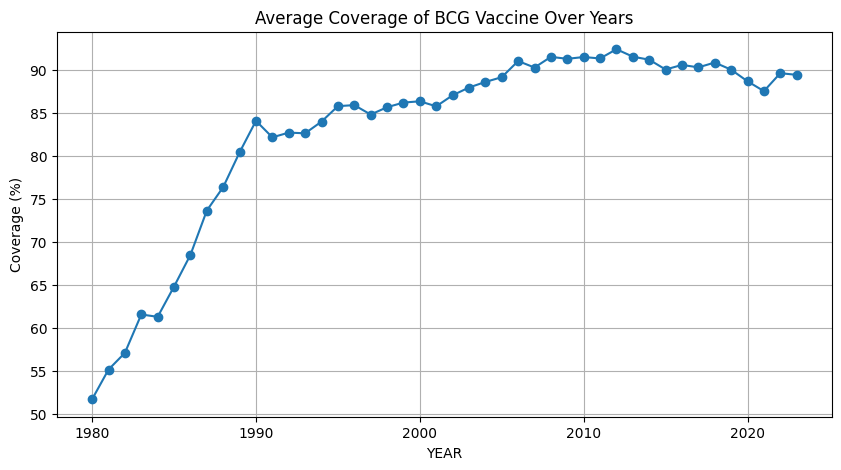

In [58]:
import os
import matplotlib.pyplot as plt

# make sure visuals/ folder exists
os.makedirs("visuals", exist_ok=True)

# Plot 1: Vaccination coverage over years (for a common vaccine)
plt.figure(figsize=(10,5))
sample_vaccine = "BCG"
vc = coverage[coverage["ANTIGEN"] == sample_vaccine]
vc.groupby("YEAR")["COVERAGE"].mean().plot(marker='o')
plt.title(f"Average Coverage of {sample_vaccine} Vaccine Over Years")
plt.ylabel("Coverage (%)")
plt.grid(True)



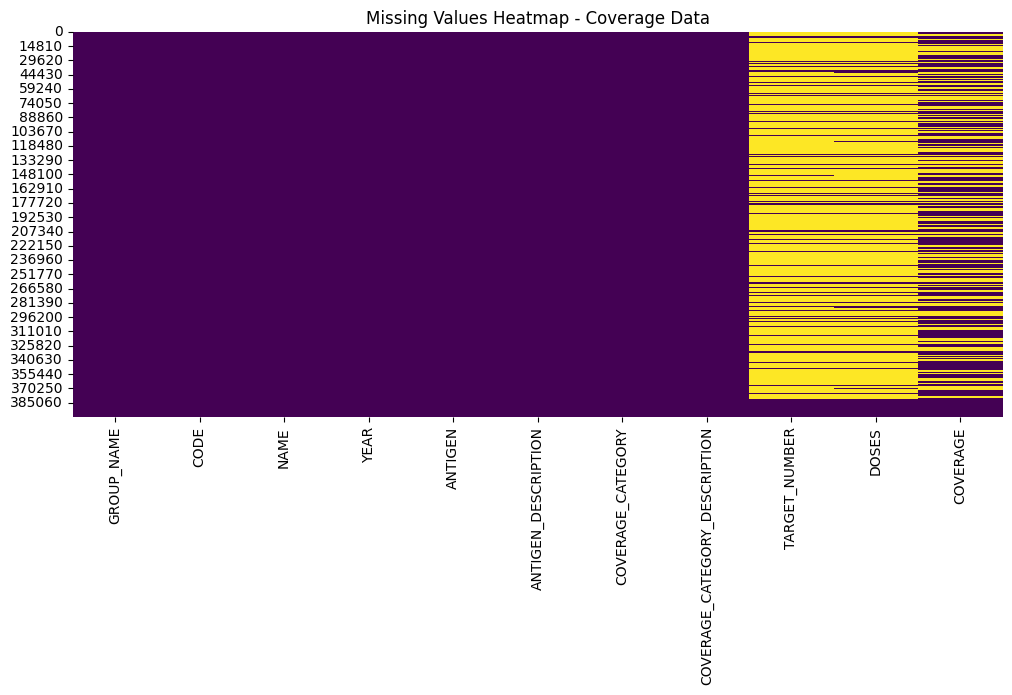

In [59]:
# Plot 2: Heatmap of nulls (useful for all datasets)
plt.figure(figsize=(12,5))
sns.heatmap(coverage.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap - Coverage Data")
plt.savefig("visuals/nulls.png")
plt.show()

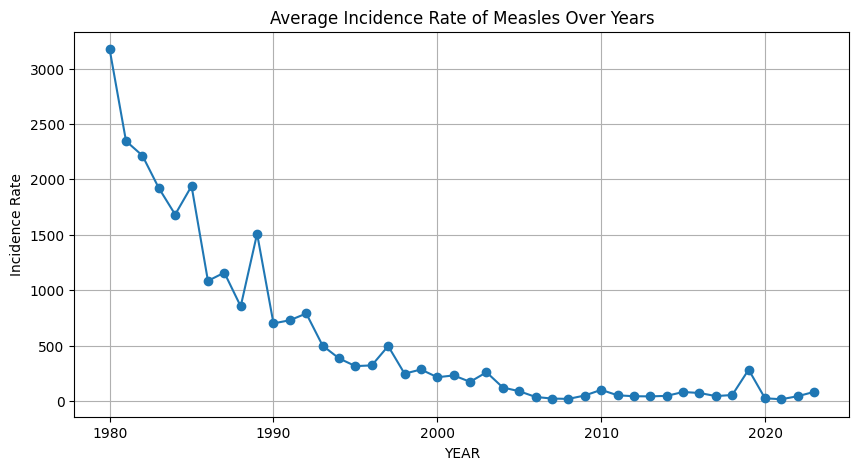

In [60]:
# Average incidence rate over years for a sample disease (e.g., Measles)
sample_disease = "Measles"
df = incidence[incidence["DISEASE_DESCRIPTION"].str.contains(sample_disease, case=False, na=False)]

plt.figure(figsize=(10, 5))
df.groupby("YEAR")["INCIDENCE_RATE"].mean().plot(marker='o')
plt.title(f"Average Incidence Rate of {sample_disease} Over Years")
plt.ylabel("Incidence Rate")
plt.grid(True)

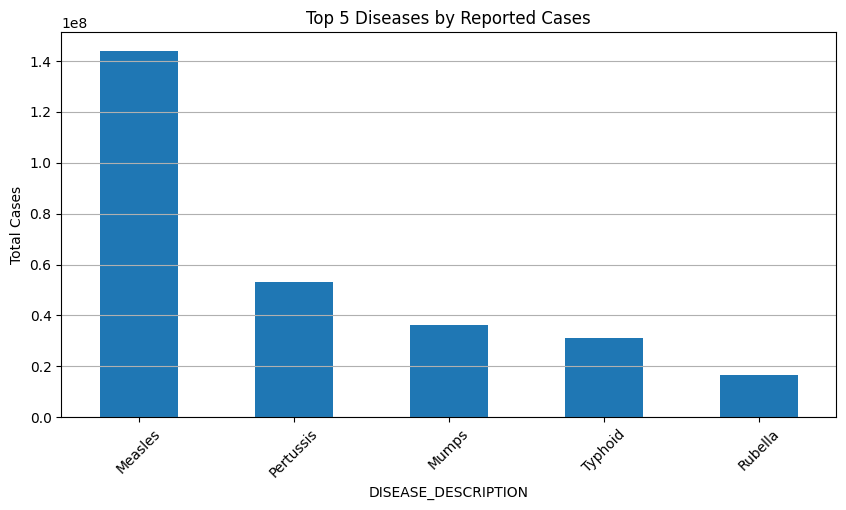

In [61]:
# Top 5 diseases by total reported cases
top_diseases = reported.groupby("DISEASE_DESCRIPTION")["CASES"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
top_diseases.plot(kind='bar')
plt.title("Top 5 Diseases by Reported Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig("visuals/top5_reported_diseases.png")
plt.show()

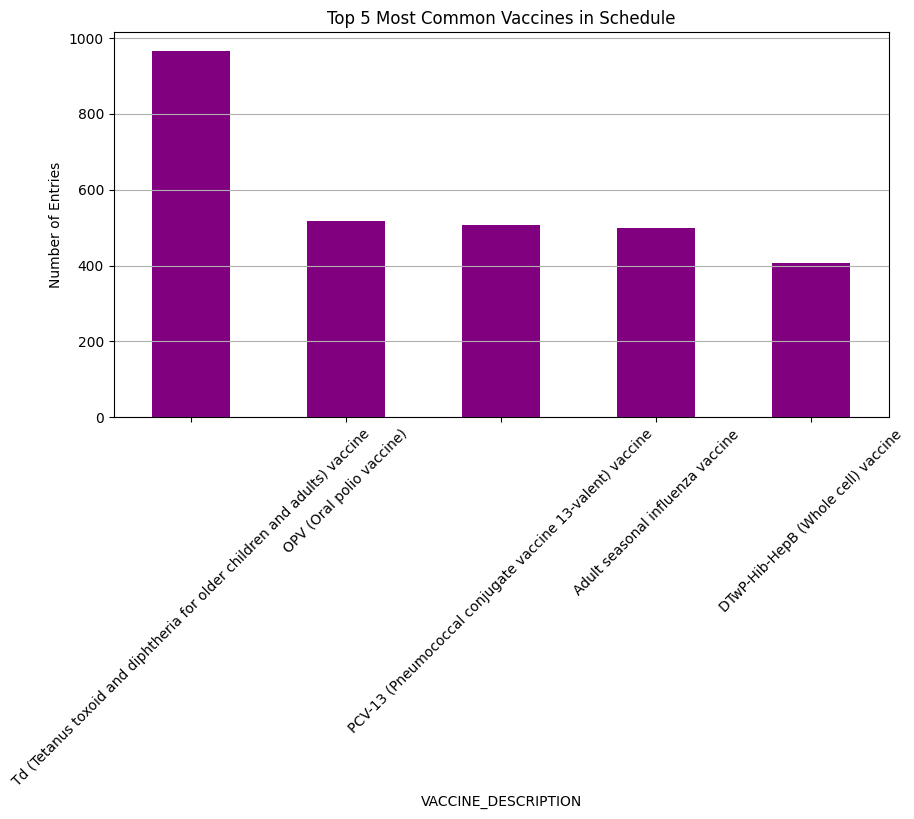

In [62]:
# Most common vaccines in the schedule
top_vaccines = schedule["VACCINE_DESCRIPTION"].value_counts().head(5)

plt.figure(figsize=(10, 5))
top_vaccines.plot(kind='bar', color='purple')
plt.title("Top 5 Most Common Vaccines in Schedule")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save inside visuals/ folder
plt.savefig("visuals/top_vaccines_schedule.png")
plt.show()

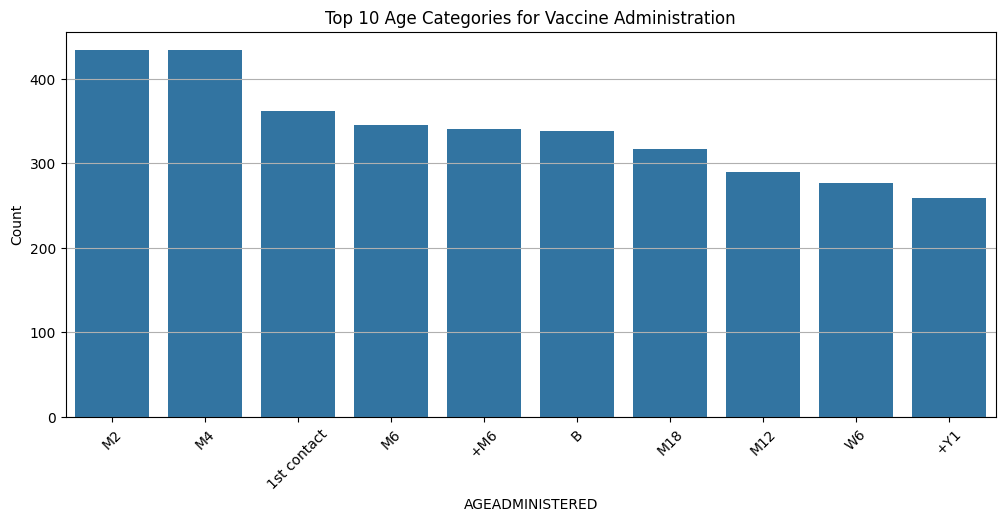

In [63]:
# Age distribution of vaccine administration
plt.figure(figsize=(12, 5))
sns.countplot(
    data=schedule,
    x="AGEADMINISTERED",
    order=schedule["AGEADMINISTERED"].value_counts().index[:10]
)
plt.title("Top 10 Age Categories for Vaccine Administration")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.grid(axis='y')

# Save to visuals folder inside Colab
plt.savefig("visuals/age_distribution_vaccines.png")
plt.show()

# **Conclusion -**
The vaccination and disease incidence analysis project successfully integrated multiple datasets to provide a structured understanding of global health trends. By cleaning, organizing, and storing data in a SQLite database, the project ensured reliable access for analysis. Visualizations revealed key insights such as vaccine coverage trends over years, most affected diseases, top vaccines in schedules, and age patterns in administration. These findings highlight the importance of data-driven approaches in monitoring vaccination effectiveness, identifying public health challenges, and supporting policy-making.